In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


Text(0, 0.5, 'PDF(X)')

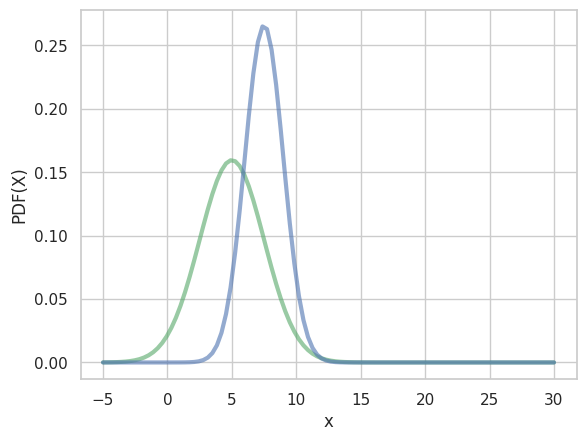

In [ ]:
#1. Generar dos distribuciones de probabilidad centradas en 5.0, 7.5 con desviación estandar de 2.5 y 1.5 respectivamente.
#Realizar un gráfico de ambas distribuciones de probabilidad.


# a) Emplear el objeto stats.norm y el metodo Probability density function (pdf)

# b) Realizar un gráfico de ambas distribuciones


mean1 =5
mean2=7.5
desv1=2.5
desv2=1.5

f1 = stats.norm(loc = mean1, scale = desv1)
f2 = stats.norm(loc = mean2, scale = desv2)
x=np.linspace(-5, 30,100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, f1.pdf(x),'g-', lw = 3, alpha = 0.6, label='pdf 1')
ax.plot(x, f2.pdf(x),'b-', lw = 3, alpha = 0.6, label='pdf 2')
ax.set_xlabel("x")
ax.set_ylabel("Distribución de probabilidad")

In [ ]:
# 2. ¿Qué frontera analítica puede separar los datos?. Determine una expresión analítica en este caso.

Si queremos hacerlo de forma analítica entonces sabemos que la función densidad de probabilidad es:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

Ahora igualamos las 2 densidades de probabilidad para hallar la frontera:

$\frac{1}{\sigma_1 \sqrt{2\pi}} e^{-\frac{(x - \mu_1)^2}{2\sigma_1^2}} = \frac{1}{\sigma_2 \sqrt{2\pi}} e^{-\frac{(x - \mu_2)^2}{2\sigma_2^2}}$

Al final luego de simplificar la igualdad y tomar logaritmos tenemos:

$-\frac{(x - \mu_1)^2}{2\sigma_1^2} = -\frac{(x - \mu_2)^2}{2\sigma_2^2} + \log\left(\frac{\sigma_2}{\sigma_1}\right)$

Esto es una ecuación cuadrática en $x$  que podemos resolver para el punto de intersección que representara la frontera analitica que mejor separa nuestros datos.






In [ ]:
# 3. Empleando el metodo Random variates(rvs), genere 100 muestas aleatorias para cada distribución, estos seran los datos de entrenamiento

mu1, sigma1 = 5.0, 2.5
mu2, sigma2 = 7.5, 1.5

samples_dist1 = norm.rvs(loc=mu1, scale=sigma1, size=100)
samples_dist2 = norm.rvs(loc=mu2, scale=sigma2, size=100)

print(samples_dist1[:10],samples_dist2[:10])

[8.55713116 4.38738015 5.22471557 1.52830149 9.06256341 7.60773349
 7.56079896 5.94328984 1.64669842 3.7064302 ] [8.71003224 6.15881016 8.025587   8.04091932 6.62637611 4.98012263
 5.4870441  4.96015438 5.31797423 6.326203  ]


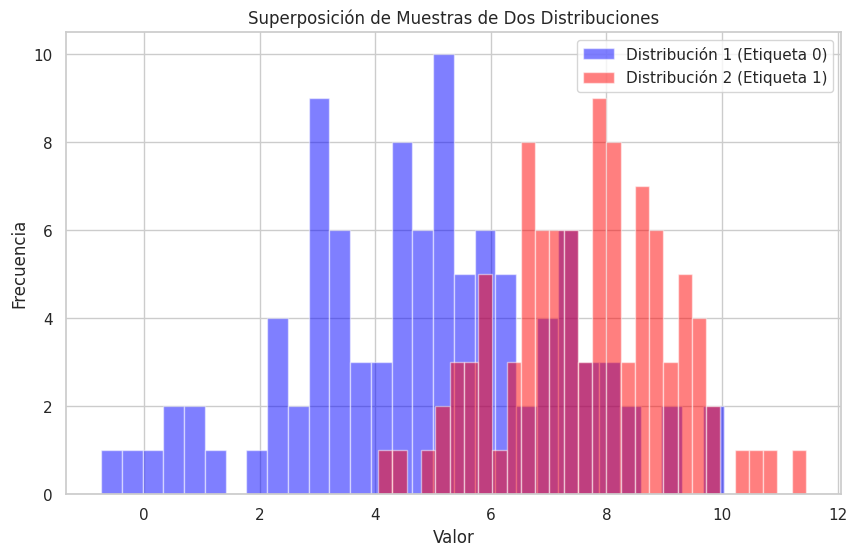

In [ ]:
# 4.Realice un gráfico en el que pueda superponer ambas distribuciones, estas 200 muestas serán las caracteristicas (features) de nuestro data frame,
#para cada característica tendremos una etiqueta(labels) correspondiente a 0 ó 1.

# Etiquetas
labels_dist1 = np.zeros(100)
labels_dist2 = np.ones(100)


features = np.concatenate([samples_dist1, samples_dist2])# Unir las muestras en un solo arreglo de características (features) y etiquetas (labels)
labels = np.concatenate([labels_dist1, labels_dist2])

df = pd.DataFrame({'features': features, 'labels': labels}) # El dataframe

# Graficamoss las dos distribuciones de muestras
plt.figure(figsize=(10, 6))
plt.hist(samples_dist1, bins=30, alpha=0.5, label='Distribución 1 (Etiqueta 0)', color='blue')
plt.hist(samples_dist2, bins=30, alpha=0.5, label='Distribución 2 (Etiqueta 1)', color='red')
plt.title('Superposición de Muestras de Dos Distribuciones')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()





In [ ]:
#5.Con los datos anteriores construya un DataFrame con los features y labels de la siguiente forma:

df

,features,labels
0,6.370187,0.0
1,-0.154986,0.0
2,5.889635,0.0
3,7.302252,0.0
4,6.945923,0.0
...,...,...
195,8.767844,1.0
196,9.360103,1.0
197,7.165160,1.0
198,7.025809,1.0


In [ ]:
# 6.Construye un segundo data frame con 50 datos de test, asociados a las muestras de las dos distribuciones,
#estos serán los datos de test empleados para validar los algoritmos de clasificación df_test con claves Y, X_1.



samples_test_dist1 = norm.rvs(loc=mu1, scale=sigma1, size=25) #Pues 25 muestras pa' cada distribucion
samples_test_dist2 = norm.rvs(loc=mu2, scale=sigma2, size=25)


labels_test_dist1 = np.zeros(25)  #Etiquetas 0 y 1 de las distribuciones
labels_test_dist2 = np.ones(25)


features_test = np.concatenate([samples_test_dist1, samples_test_dist2])  # Unir las muestras en un solo arreglo de características (X_1) y etiquetas (Y)
labels_test = np.concatenate([labels_test_dist1, labels_test_dist2])
df_test = pd.DataFrame({'X_1': features_test, 'Y': labels_test}) # El dataframe

df_test


,X_1,Y
0,5.451338,0.0
1,4.651146,0.0
2,3.645149,0.0
3,7.300260,0.0
4,5.258903,0.0
5,0.328340,0.0
6,3.329254,0.0
7,5.794973,0.0
8,5.220403,0.0
9,4.178995,0.0


In [ ]:
#7.
"""Por ahora, emplearemos clasificadores bajo un modelo de caja negra. La forma para implementar el modelo es la siguiente:
Definir el modelo y realizar el fit:
  clf = LinearRegression()
  clf.fit(X_train, Y_train)
Determinar el score de los datos de entrenamiento
score = clf.score(X_train, Y_train)
Determinar el score para los datos de test, ¿que puede concluir mirando los scores?
Nota: Emplear los siguientes clasificadores de machine learning y determinar los score para cada modelo.

  - DecisionTreeClassifier(max_depth=3),
  - SVC(kernel="linear", C=0.025)"""



X_train = df[['features']].values  # Características de entrenamiento
Y_train = df['labels'].values      # Etiquetas de entrenamiento
# Asignar los datos de test
X_test = df_test[['X_1']].values   # Características
Y_test = df_test['Y'].values       # Etiquitas

#DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(X_train, Y_train)
# Score de entrenamiento y test
train_score_tree = clf_tree.score(X_train, Y_train)
test_score_tree = clf_tree.score(X_test, Y_test)
print(f"DecisionTreeClassifier - Training Score: {train_score_tree}")
print(f"DecisionTreeClassifier - Test Score: {test_score_tree}")

# SVC
clf_svc = SVC(kernel="linear", C=0.025)
clf_svc.fit(X_train, Y_train)
# Score de entrenamiento y test
train_score_svc = clf_svc.score(X_train, Y_train)
test_score_svc = clf_svc.score(X_test, Y_test)
print(f"SVC - Training Score: {train_score_svc}")
print(f"SVC - Test Score: {test_score_svc}")




DecisionTreeClassifier - Training Score: 0.805
DecisionTreeClassifier - Test Score: 0.8
SVC - Training Score: 0.78
SVC - Test Score: 0.78


Ya que ambos scores tanto del de test como el de entrenamiento son similares y tienen valores altos  pues entonces podemos decir que el modelo generaliza bien para datos no vistos. Diriamos que en este caso SVC fue mas efectivo.

In [ ]:
# 8)
"""Existen librerias que pueden optmizar los hyperparametros de cualquier modelo: GridSearchCV prueba a implementar las siguientes lineas de código con el siguiente modelo:
from sklearn.model_selection import GridSearchCV

  param_grid = {
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

  CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
  CV_clf.fit(x_train, y_train)"""




# parámetros para GridSearchCV
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'criterion' : ['gini', 'entropy']
}


clf = DecisionTreeClassifier()  #Vamos usar decisionTree , entonces inicializamos


CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)

CV_clf.fit(X_train, Y_train) #Entrenamos

# los mejores parámetros encontrados por GridSearchCV
best_params = CV_clf.best_params_
best_score = CV_clf.best_score_

print(f"Mejores parámetros encontrados por GridSearchCV: {best_params}")
print(f"Mejor score durante la validación cruzada: {best_score}")

# Calcular el score en el conjunto de test con el mejor modelo encontrado
test_score = CV_clf.score(X_test, Y_test)
print(f"Score en el conjunto de test: {test_score}")


Mejores parámetros encontrados por GridSearchCV: {'criterion': 'entropy', 'max_depth': 4}
Mejor score durante la validación cruzada: 0.76
Score en el conjunto de test: 0.8


El codigo me tira los mejores hiperparamertos (max_depth y criterion)

El mejor score obtenido durante la validación cruzada en el conjunto de entrenamiento.


El score final al aplicar el modelo optimizado en los datos de test.

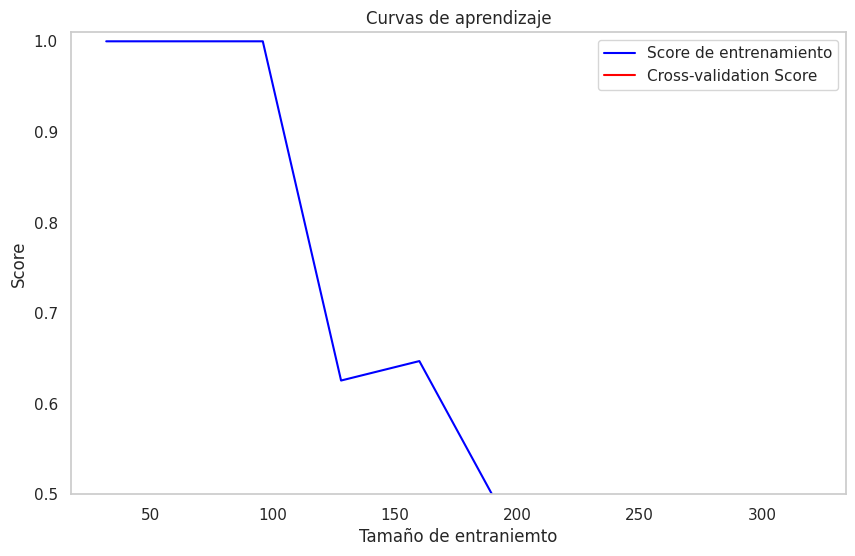

In [ ]:
# 9.

"""En los algoritmos de machining learning es de suma importancia conocer las curvas de aprendizaje para decidir si el algoritmo funciona de manera optima, emplea las siguiente lineas de código para mostrar las curvas de aprendizaje de la regresion lineal.
title = "Learning Curves"
plot_learning_curve(
    regr, title, Xtr_, ytr_,  ylim=(0.5, 1.01),  n_jobs=4
) """


  #Toca  hacer la funcion pa plotear la curva de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Score de entrenamiento', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation Score', color='red')

    if ylim is not None:
        plt.ylim(*ylim)

    plt.title(title)
    plt.xlabel('Tamaño de entraniemto')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Creamois  y entrnamos el modelo de regresion lineal
regr = LinearRegression()
Xtr_ = df[['features']].values  # Características
ytr_ = df['labels'].values       # Etiquetas
title = "Curvas de aprendizaje"
plot_learning_curve(regr, title, Xtr_, ytr_, ylim=(0.5, 1.01), n_jobs=4)


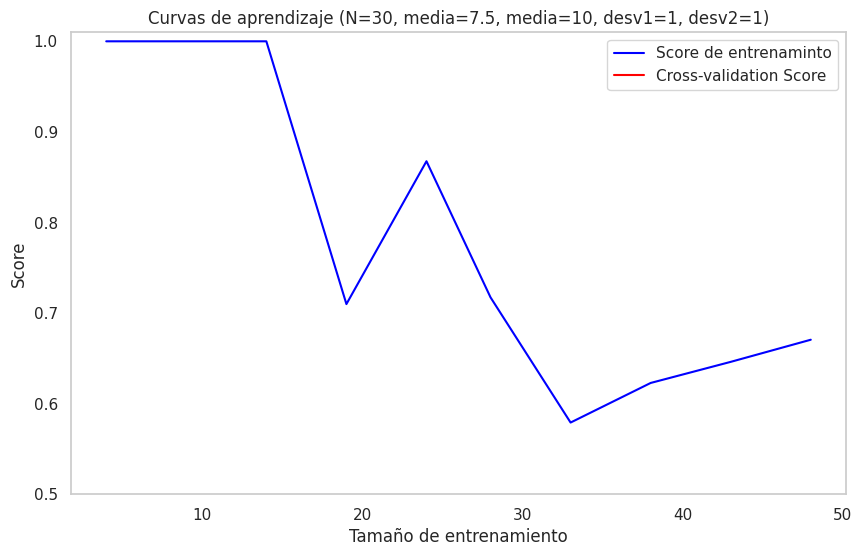

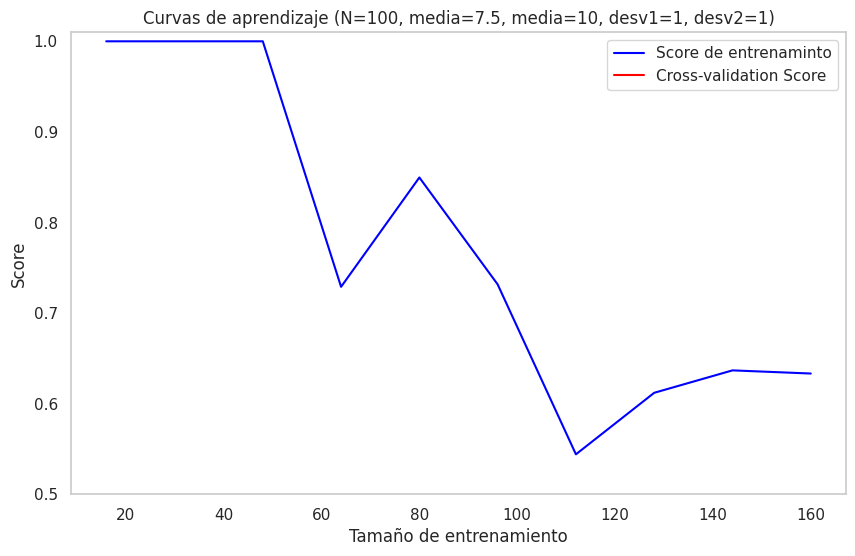

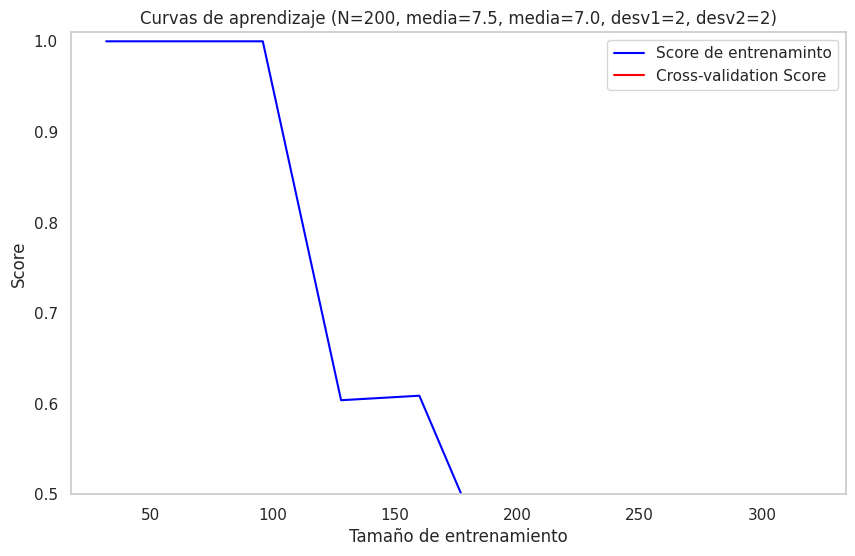

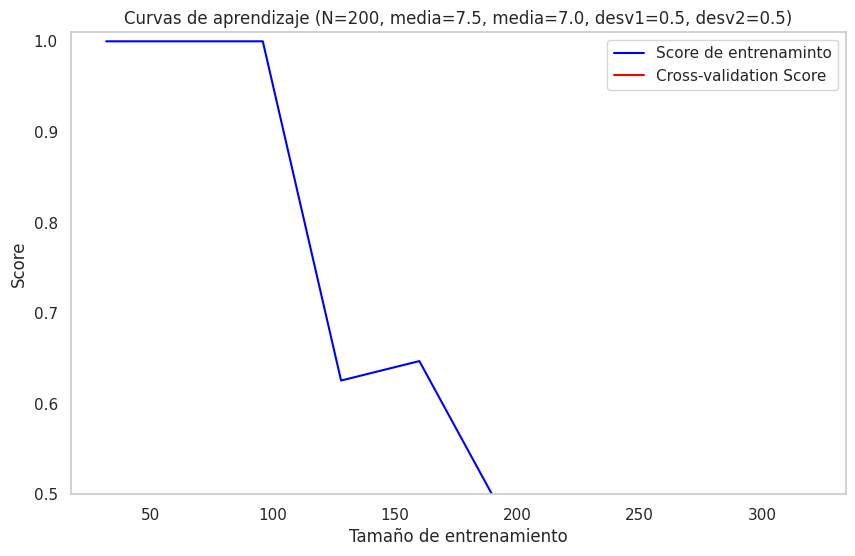

In [ ]:
#10)
""" Prueba a construir curvas de aprendizaje para los siguientes valores en las distribuciones(emplea una regresion lineal):
Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1
Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2
Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5
-¿Qué puede concluir? de cada prueba. """





def generate_data(mean1, mean2, std1, std2, size):  # La función
    samples_dist1 = np.random.normal(loc=mean1, scale=std1, size=size)
    samples_dist2 = np.random.normal(loc=mean2, scale=std2, size=size)
    labels_dist1 = np.zeros(size)  # eTiquetas
    labels_dist2 = np.ones(size)
    features = np.concatenate([samples_dist1, samples_dist2])
    labels = np.concatenate([labels_dist1, labels_dist2])
    return features, labels

# Funcion para graficar las curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Score de entrenaminto', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation Score', color='red')

    if ylim is not None:
        plt.ylim(*ylim)

    plt.title(title)
    plt.xlabel('Tamaño de entrenamiento')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Configuraciones de prueba
test_configs = [
    (7.5, 10, 1, 1, 30),
    (7.5, 10, 1, 1, 100),
    (7.5, 7.0, 2, 2, 200),
    (7.5, 7.0, 0.5, 0.5, 200)
]

# Evaluamos
for mean1, mean2, std1, std2, size in test_configs:
    features, labels = generate_data(mean1, mean2, std1, std2, size)# Generar datos
    df = pd.DataFrame({'features': features, 'labels': labels})# Crear un DataFrame para la regresión lineal
    regr = LinearRegression()# Crear el modelo de regresión lineal
    title = f"Curvas de aprendizaje (N={size}, media={mean1}, media={mean2}, desv1={std1}, desv2={std2})"
    plot_learning_curve(regr, title, df[['features']].values, df['labels'].values, ylim=(0.5, 1.01), n_jobs=4)


**Resultados esperados y conclusiones:**


**Para 30 datos de entrenamiento (medias 7.5 y 10, desviaciones 1):**

Observaciones: Es probable que las curvas de aprendizaje muestren un alto rendimiento en el conjunto de entrenamiento pero una diferencia significativa con el conjunto de validación, lo que puede indicar que el modelo está sobreajustado a los pocos datos disponibles.

**Para 100 datos de entrenamiento (medias 7.5 y 10, desviaciones 1):**

Observaciones: Las curvas pueden comenzar a acercarse más entre sí, indicando una mejor generalización que con 30 datos, aunque el modelo aún puede mostrar algún grado de sobreajuste.

**Para 200 datos de entrenamiento (medias 7.5 y 7.0, desviaciones 2):**

Observaciones: Con más datos y una mayor varianza en las desviaciones estándar, se podria esperar que el modelo tenga una buena capacidad de generalización, con las curvas de entrenamiento y validación posiblemente convergiendo.

**Para 200 datos de entrenamiento (medias 7.5 y 7.0, desviaciones 0.5):**

Observaciones: Las curvas de aprendizaje muestran un alto rendimiento en ambos conjuntos (entrenamiento y validación), indicando que el modelo se está ajustando bien a los datos con poca varianza.